
# PEC3. Machine Learning



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BBDD_PEC3.csv')

## Pregunta 1: Aprendizaje No Supervisado (40 puntos)

Se pide crear un modelo KMEANS para clasificar las viviendas del conjunto de datos y representarlo gráficamente en el propio Notebook de Python. En este caso debéis tener en cuenta el número de clusters (k) que queréis que tenga vuestro modelo, podéis poner el que consideréis, pero se recomienda utilizar el llamado “elbow method” para estimarlo.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
df.head()


,Unnamed: 0,propertyCode,floor,price,propertyType,operation,size,exterior,rooms,bathrooms,...,has360,hasStaging,superTopHighlight,topNewDevelopment,newDevelopmentFinished,typology_inmo,hasparking,parking_price_included,parking_price,zipcode
0,0,826301.0,bj,430000.0,chalet,sale,162.0,False,4.0,3,...,False,False,False,False,True,urban,True,True,0.0,43201
1,1,1030384.0,5,310000.0,penthouse,sale,180.0,True,3.0,2,...,True,False,False,False,True,urban,True,True,0.0,50011
2,2,1045615.0,bj,129000.0,chalet,sale,501.0,False,6.0,3,...,False,False,False,False,True,urban,False,False,0.0,43350
3,3,1266023.0,5,250000.0,flat,sale,180.0,True,5.0,2,...,False,False,False,False,True,urban,False,False,0.0,43201
4,4,1457050.0,bj,25000.0,chalet,sale,248.0,False,5.0,1,...,False,False,False,False,True,urban,False,False,0.0,44360


In [3]:
#Comprobamos que no haya ninguna casilla sin dato
df.isnull().sum().sum()

0

In [4]:
#Extraemos las columnas que no nos aporten información numerica, para poder realizar una PCA
df_2=df.select_dtypes(exclude=['bool', 'object'])
df_num = df_2.drop(df_2.columns[0:2], axis=1)
df_num.head()


,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,parking_price
0,430000.0,162.0,4.0,3,41.121714,1.154686,5330.0,2654.0,0.0
1,310000.0,180.0,3.0,2,41.656613,-0.937180,4117.0,1722.0,0.0
2,129000.0,501.0,6.0,3,41.169864,1.021031,7526.0,257.0,0.0
3,250000.0,180.0,5.0,2,41.156019,1.104717,357.0,1389.0,0.0
4,25000.0,248.0,5.0,1,40.569182,-1.313592,55596.0,101.0,0.0


In [5]:
df_corr=df_num.corr()
df_corr.head()

,price,size,rooms,bathrooms,latitude,longitude,distance,priceByArea,parking_price
price,1.000000,0.442420,0.315583,0.516089,0.158476,0.211002,-0.081423,0.618299,0.065311
size,0.442420,1.000000,0.615741,0.668188,-0.081766,-0.032538,0.194239,-0.246562,-0.010857
rooms,0.315583,0.615741,1.000000,0.563240,-0.012655,0.047950,0.114580,-0.214513,0.021941
bathrooms,0.516089,0.668188,0.563240,1.000000,-0.046621,0.009526,0.107570,-0.038574,0.020854
latitude,0.158476,-0.081766,-0.012655,-0.046621,1.000000,0.795940,0.114930,0.231457,0.035443


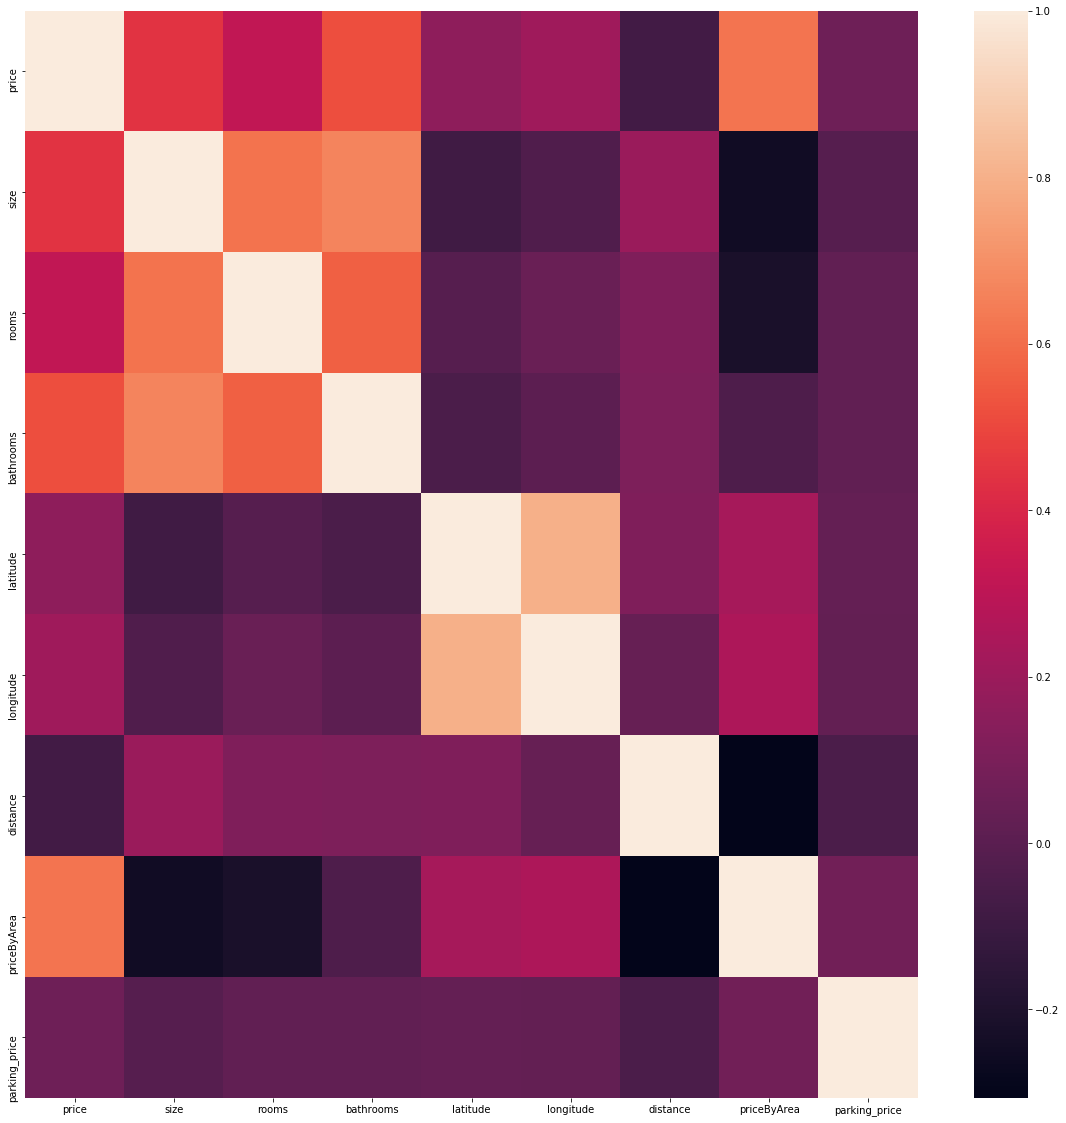

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(df_corr.iloc[:50,:50])
plt.show()

In [7]:
#Estandarizar las variables
from sklearn.preprocessing import StandardScaler 
std=StandardScaler()

In [8]:
df_std = pd.DataFrame(std.fit_transform(df_num), columns=df_num.columns)

In [9]:
#Análisis de PCA y el codo
from sklearn.decomposition import PCA
pca=PCA().fit(df_std)
varianza=pca.explained_variance_ratio_
sum_var=np.cumsum(varianza)


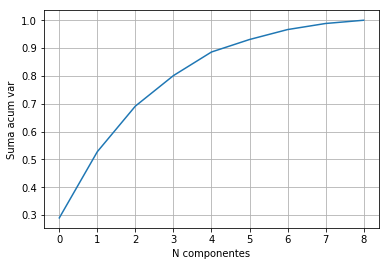

In [10]:
plt.plot(sum_var)
plt.xlabel('N componentes')
plt.ylabel('Suma acum var')
plt.grid()
plt.show()

In [11]:
#Escojo 5 componentes porque explican más del 90% de los resultados.
pca_2=PCA(n_components=5)
pca_valor=pca_2.fit_transform(df_std)


In [12]:
pca_v2=pca_2.components_.T
pca_v2

array([[ 0.42442556, -0.32028938,  0.34784538, -0.0997004 ,  0.27482818],
       [ 0.52965949,  0.17953252, -0.04871748, -0.01235163, -0.04217484],
       [ 0.4816343 ,  0.1360226 , -0.09826346,  0.05939362, -0.34413622],
       [ 0.5312192 ,  0.0734204 ,  0.07648213, -0.01800491,  0.0055573 ],
       [ 0.05062215, -0.52368308, -0.44580312,  0.02293453, -0.12115549],
       [ 0.09153053, -0.53154998, -0.39676984,  0.00312747, -0.23503199],
       [ 0.11612427,  0.14275058, -0.53339826,  0.0248151 ,  0.79799551],
       [ 0.00561992, -0.50697084,  0.45431157, -0.11197496,  0.30517057],
       [ 0.02648502, -0.0842827 ,  0.11851389,  0.98608597,  0.06622336]])

In [13]:

df_pca=pd.DataFrame(pca_2.components_.T)


In [14]:
df_pca.head()

,0,1,2,3,4
0,0.424426,-0.320289,0.347845,-0.099700,0.274828
1,0.529659,0.179533,-0.048717,-0.012352,-0.042175
2,0.481634,0.136023,-0.098263,0.059394,-0.344136
3,0.531219,0.073420,0.076482,-0.018005,0.005557
4,0.050622,-0.523683,-0.445803,0.022935,-0.121155


In [15]:
#A partir, de aqui, caluclaremos las K means con menos variables de las que principalmente habíamos obtenido

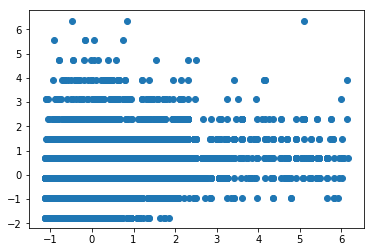

In [16]:
x=df_std['price']
y=df_std['rooms']

plt.scatter(x, y)
plt.show()

In [17]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4).fit(df_std)
centroids=kmeans.cluster_centers_
print(centroids)


[[-0.18213378 -0.54709217 -0.50946748 -0.57171293  0.24103989  0.16552086
  -0.35975014  0.37782383  0.03049465]
 [-0.41140068  0.17166064  0.28231174  0.24698743 -0.15179334 -0.1129817
   0.46882692 -0.72087912 -0.07502154]
 [-0.32139861  0.61145327  0.28482148  0.28822008 -5.5876896  -5.12177493
  -0.30901323 -0.77281918 -0.13596848]
 [ 1.8894556   1.56847943  1.17169241  1.51098488  0.38015289  0.4934051
   0.17273283  0.62187192  0.10820748]]


<function matplotlib.pyplot.show(*args, **kw)>

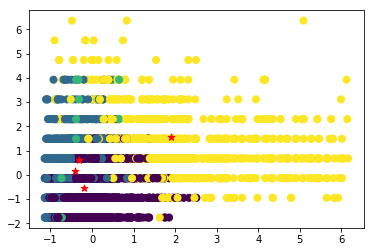

In [18]:
plt.scatter(x, y, c=kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='*', s=50)
plt.show

In [19]:
clust=kmeans.predict(df_std)
print(clust)

[1 1 3 ... 0 1 0]


In [23]:
krango=range(1,50)
sse=[]
for k in krango:
    kmeans=KMeans(n_clusters=k).fit(df_std)
    sse.append(kmeans.inertia_)

In [24]:
print(sse)

[110853.0, 90224.9040151676, 75298.3330265494, 64742.55239252625, 56081.49235781604, 48334.82108452048, 42185.748401595185, 38394.777431114206, 35417.322435611364, 33037.10084409793, 31366.063021582555, 29825.05872267042, 28712.267787330224, 27728.037544050003, 26636.30731898556, 25738.577762570552, 25170.039087932586, 24487.81891877798, 23691.094034642927, 23183.34750032381, 22501.5846613078, 21852.18777178237, 21441.191843356493, 21005.38835062367, 20497.92669104007, 20102.120434137883, 19654.68461247631, 19183.90581834689, 18940.456461632533, 18669.27742857015, 18278.50130894509, 17946.885131319334, 17578.800727868038, 17634.48137580635, 17137.563894511368, 16845.731944141517, 16645.34575408487, 16453.654473777544, 16274.983925584425, 15974.193476289805, 15790.605561047012, 15583.876919583583, 15398.71528689544, 15197.453081511798, 15018.106290274938, 14963.98656145673, 14763.943470268037, 14558.98392654065, 14365.46577399162]


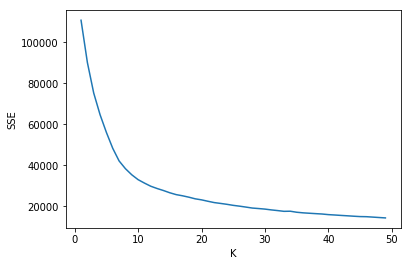

In [29]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krango, sse)
plt.show()

## Pregunta 2: Aprendizaje Supervisado (40 puntos) 

Se pide crear un modelo Linear Regression, para ello se deberá entrenar con el 80% del conjunto de datos (training set). Posteriormente se comprobará la precisión del modelo entrenado con el 20% restante (testing set).

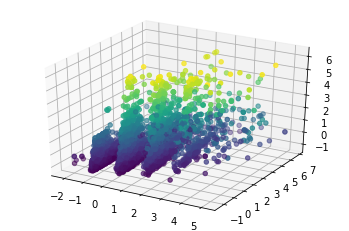

In [57]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = plt.axes(projection='3d')

z = df_std['price']
x = df_std['bathrooms']
y = df_std['size']

ax.scatter3D(x, y, z, c=z)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = df[['bathrooms', 'size']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [43]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_pred=model.predict(x_test)

## Pregunta 3: Evaluación de Modelos (20 puntos)

Una vez creado el modelo Linear Regression, vamos a evaluar gráficamente la precisión del modelo. Para ello se pide representar con alguna librería de Python de las vistas en el primer Módulo tanto el resultado conocido del testing set vs el resultado que predice el modelo para ese mismo conjunto de datos.

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)


In [48]:
print(r2, mse)

0.26840149830729565 50951043614.069046


TypeError: expected 1D vector for x

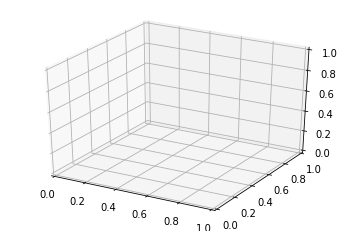

In [58]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

Xa = x_train
Ya = y_train
Xb = x_test
Yb = y_test

coeffs1 = np.polyfit(Xa, Ya, 1) 
line1 = np.poly1d(coeffs1)

coeffs2 = np.polyfit(Xb, Yb, 1) 
line2 = np.poly1d(coeffs2)


ax.scatter3D(Xa, Ya, color='red', label='Dimensiones y baños')
ax.scatter3D(Xb, Yb, color='blue', label='Precio')
ax.plot(Xa, line1(x), color='red', linestyle='--', label='Train')
ax.plot(Xb, line2(x), color='blue', linestyle='--', label='Test')



ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.legend()
plt.title('Comparación entre training ')
plt.grid(True)


plt.show()
